<a href="https://colab.research.google.com/github/gabopy-glitch/Aprendizaje-Autom-tico/blob/main/Agrupamiento_kMeans_Piedra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento k-Means
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Gabriel Piedra &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [1]:
pip install pyreadstat

In [2]:
# Paquetes necesarios
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [3]:
df, meta = pyreadstat.read_sav("egresos_hospitalarios_2024.sav")

display(df.head())
print()
display(df.describe())
print("Codificación:")
display(meta.value_labels)

,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10
0,24,2.0,1.0,2.0,218,1.0,3.0,4.0,6.0,7.0,1.0,24,2.0,2024-05-08,2024-05-09,1.0,1.0,52.0,U072
1,09,1.0,1.0,2.0,218,1.0,4.0,81.0,6.0,7.0,1.0,09,1.0,2023-12-30,2024-01-02,3.0,1.0,52.0,U071
2,09,1.0,1.0,2.0,218,2.0,4.0,88.0,6.0,7.0,1.0,09,1.0,2024-01-09,2024-01-11,2.0,1.0,52.0,U071
3,09,1.0,1.0,2.0,218,2.0,4.0,82.0,6.0,7.0,1.0,09,1.0,2024-01-15,2024-01-19,4.0,1.0,52.0,U071
4,01,1.0,1.0,2.0,218,1.0,4.0,1.0,6.0,7.0,1.0,01,1.0,2024-02-08,2024-02-13,5.0,1.0,52.0,U072


,area_ubi,tipo,sector,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,area_res,dia_estad,con_egrpa,esp_egrpa
count,1.132665e+06,1.132665e+06,1.132665e+06,1.132665e+06,1.132665e+06,1.132665e+06,1.132665e+06,1.132665e+06,1.132665e+06,1.132665e+06,1.132665e+06,1.132665e+06,1.132665e+06
mean,1.031964e+00,1.934313e+00,1.417680e+00,1.613195e+00,3.881468e+00,3.786916e+01,6.263744e+00,5.393829e+00,2.310902e+00,1.162172e+00,4.511891e+00,1.027826e+00,2.712598e+01
std,1.759055e-01,1.657117e+00,6.254065e-01,4.870185e-01,5.233753e-01,2.405095e+01,1.511977e+00,2.500826e+00,2.929103e+00,3.686082e-01,1.814891e+01,2.267334e-01,1.472591e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,2.000000e+01,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.700000e+01
50%,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,3.300000e+01,6.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.700000e+01
75%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,5.700000e+01,6.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,4.100000e+01
max,2.000000e+00,5.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,1.150000e+02,9.000000e+00,9.000000e+00,9.000000e+00,2.000000e+00,5.142000e+03,3.000000e+00,5.200000e+01


Codificación:


{'labels0': {'10': 'Imbabura',
  '20': 'Galápagos',
  '01': 'Azuay',
  '11': 'Loja',
  '21': 'Sucumbíos',
  '02': 'Bolívar',
  '12': 'Los Ríos',
  '22': 'Orellana',
  '03': 'Cañar',
  '13': 'Manabí',
  '23': 'Santo Domingo de los Tsáchilas',
  '04': 'Carchi',
  '14': 'Morona Santiago',
  '24': 'Santa Elena',
  '05': 'Cotopaxi',
  '15': 'Napo',
  '06': 'Chimborazo',
  '16': 'Pastaza',
  '07': 'El Oro',
  '17': 'Pichincha',
  '08': 'Esmeraldas',
  '18': 'Tungurahua',
  '09': 'Guayas',
  '19': 'Zamora Chinchipe'},
 'labels1': {1.0: 'Urbana', 2.0: 'Rural'},
 'labels2': {1.0: 'Agudo',
  2.0: 'Crónico',
  3.0: 'Clínicas generales sin especialidad',
  4.0: 'Establecimientos sin internación',
  5.0: 'Sin tipo hospitales básicos'},
 'labels3': {1.0: 'Público',
  2.0: 'Privado con fines de lucro',
  3.0: 'Privado sin fines de lucro'},
 'labels4': {1.0: 'Hombre', 2.0: 'Mujer', 3.0: 'Indeterminado'},
 'labels5': {1.0: 'Horas (1 a 23 horas de edad)',
  2.0: 'Días (1 a 28 días de edad)',
  3.0: 'Mes

In [4]:
#Variables numéricas y categóricas (codificadas)
vars_paciente = ["edad", "dia_estad", "sexo", "area_res", "con_egrpa", "etnia", "dis_pac"]
X = df[vars_paciente]
X_scaled = StandardScaler().fit_transform(X)
print("Escalados numéricos y categóricos")
display(X_scaled)

Escalados numéricos y categóricos


array([[-1.40822613, -0.19350433, -1.25908096, ..., -0.12272361,
        -0.17443688, -0.44754414],
       [ 1.79331174, -0.08330482, -1.25908096, ..., -0.12272361,
        -0.17443688, -0.44754414],
       [ 2.08436064, -0.13840458,  0.79423011, ..., -0.12272361,
        -0.17443688, -0.44754414],
       ...,
       [ 1.33594919, -0.13840458,  0.79423011, ..., -0.12272361,
        -0.17443688,  2.28366891],
       [-0.07771689, -0.19350433, -1.25908096, ...,  4.28774483,
        -0.17443688, -0.44754414],
       [-1.15875565, -0.19350433, -1.25908096, ...,  4.28774483,
        -0.17443688, -0.44754414]])

---
## <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 10.</li>
  <li>Identifica visualmente el "codo" en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>De manera intuitiva, explica por qué consideras ese punto como el codo y cómo influye en la calidad de los clústeres.</li>
</ul>
</div>


In [5]:
#Calculamos la inercia para el gráfico del codo
inercias = []
for k in range(1, 20):
  modelo = KMeans(n_clusters=k, random_state=6)
  modelo.fit(X_scaled)
  inercias.append(modelo.inertia_)

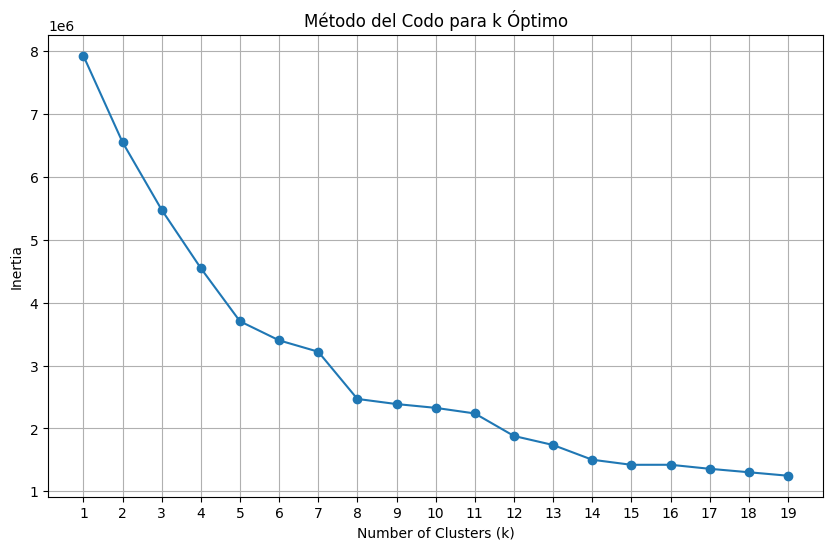

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), inercias, marker='o')
plt.title('Método del Codo para k Óptimo')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

En este caso se usará 7 como codo dado a su caída es bastante pronunciada antes de que la ganancia o las caídas empiecen a ser más planas

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [7]:
#Generamos el modelo
modelo = KMeans(n_clusters=7, random_state=6)
modelo.fit(X_scaled)

#Asignamos etiquetas
labels = modelo.labels_
df["cluster"] = ["C" + str(c) for c in labels]

#Visualizamos los primeros registros
display(df.head())

,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,cluster
0,24,2.0,1.0,2.0,218,1.0,3.0,4.0,6.0,7.0,1.0,24,2.0,2024-05-08,2024-05-09,1.0,1.0,52.0,U072,C4
1,09,1.0,1.0,2.0,218,1.0,4.0,81.0,6.0,7.0,1.0,09,1.0,2023-12-30,2024-01-02,3.0,1.0,52.0,U071,C5
2,09,1.0,1.0,2.0,218,2.0,4.0,88.0,6.0,7.0,1.0,09,1.0,2024-01-09,2024-01-11,2.0,1.0,52.0,U071,C5
3,09,1.0,1.0,2.0,218,2.0,4.0,82.0,6.0,7.0,1.0,09,1.0,2024-01-15,2024-01-19,4.0,1.0,52.0,U071,C5
4,01,1.0,1.0,2.0,218,1.0,4.0,1.0,6.0,7.0,1.0,01,1.0,2024-02-08,2024-02-13,5.0,1.0,52.0,U072,C3


In [8]:
#Cantidad de elementos por clúster
df["cluster"].value_counts()

,count
cluster,
C1,391154
C5,192743
C3,189967
C4,164771
C6,97008
C0,80147
C2,16875


In [9]:
#Medias por grupo
df.groupby("cluster")[vars_paciente].mean()

,edad,dia_estad,sexo,area_res,con_egrpa,etnia,dis_pac
cluster,,,,,,,
C0,42.408000,5.448077,1.000000,1.104982,1.001984,7.931775,8.906260
C1,27.404899,3.300976,2.000000,1.000000,1.000360,5.932367,1.034646
C2,61.742696,16.797393,1.472000,1.155911,2.815941,6.260622,2.242726
C3,22.042423,5.134471,1.000016,1.000000,1.001090,6.031584,1.041323
C4,35.797222,4.160599,1.660923,2.000000,1.001171,5.594935,1.206729
C5,70.243838,5.340630,1.464422,1.000114,1.000000,6.192707,1.054638
C6,42.347786,4.214838,2.000000,1.080901,1.001783,7.954117,8.877526


In [10]:
#Mínimo y máximo por grupo
df.groupby("cluster")[vars_paciente].agg(["min", "max"])

edad        dia_estad         sexo      area_res      con_egrpa       \
          min    max       min     max  min  max      min  max       min  max   
cluster                                                                         
C0        1.0  106.0       1.0   813.0  1.0  1.0      1.0  2.0       1.0  2.0   
C1        1.0   65.0       1.0   368.0  2.0  2.0      1.0  1.0       1.0  2.0   
C2        1.0  108.0       1.0  5142.0  1.0  2.0      1.0  2.0       1.0  3.0   
C3        1.0   55.0       1.0   696.0  1.0  2.0      1.0  1.0       1.0  2.0   
C4        1.0  115.0       1.0   573.0  1.0  2.0      2.0  2.0       1.0  2.0   
C5       27.0  115.0       1.0   888.0  1.0  2.0      1.0  2.0       1.0  1.0   
C6        1.0  107.0       1.0   301.0  2.0  2.0      1.0  2.0       1.0  2.0   

        etnia      dis_pac       
          min  max     min  max  
cluster                          
C0        2.0  9.0     3.0  9.0  
C1        1.0  9.0     1.0  9.0  
C2        1.0  9.0     1.0  9.0  
C3        1.0  9.0     1.0  9.0  
C4        1.0  9.0     1.0  9.0  
C5        1.0  9.0     1.0  9.0  
C6        2.0  9.0     3.0  9.0

In [11]:
#Primeros 5 integrantes por grupo
for cluster in df['cluster'].unique():
    print(f'cluster {cluster}: cantidad de elementos {df[df["cluster"] == cluster].shape[0]}')
    display(df[df['cluster'] == cluster].head(5))

cluster C4: cantidad de elementos 164771


,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,cluster
0,24,2.0,1.0,2.0,218,1.0,3.0,4.0,6.0,7.0,1.0,24,2.0,2024-05-08,2024-05-09,1.0,1.0,52.0,U072,C4
14,03,1.0,5.0,2.0,218,1.0,4.0,17.0,6.0,7.0,1.0,03,2.0,2024-02-19,2024-02-21,2.0,1.0,52.0,U071,C4
24,03,1.0,5.0,2.0,218,1.0,4.0,91.0,6.0,7.0,1.0,03,2.0,2024-01-22,2024-01-25,3.0,1.0,52.0,U071,C4
25,03,1.0,5.0,2.0,218,2.0,4.0,87.0,6.0,7.0,1.0,03,2.0,2024-02-21,2024-02-26,5.0,1.0,52.0,J180,C4
34,13,1.0,1.0,1.0,218,1.0,4.0,58.0,6.0,7.0,1.0,13,2.0,2024-02-12,2024-02-29,17.0,1.0,52.0,U071,C4


cluster C5: cantidad de elementos 192743


,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,cluster
1,09,1.0,1.0,2.0,218,1.0,4.0,81.0,6.0,7.0,1.0,09,1.0,2023-12-30,2024-01-02,3.0,1.0,52.0,U071,C5
2,09,1.0,1.0,2.0,218,2.0,4.0,88.0,6.0,7.0,1.0,09,1.0,2024-01-09,2024-01-11,2.0,1.0,52.0,U071,C5
3,09,1.0,1.0,2.0,218,2.0,4.0,82.0,6.0,7.0,1.0,09,1.0,2024-01-15,2024-01-19,4.0,1.0,52.0,U071,C5
7,11,1.0,1.0,1.0,218,1.0,4.0,82.0,6.0,1.0,1.0,11,1.0,2023-12-29,2024-01-02,4.0,1.0,52.0,U071,C5
8,11,1.0,1.0,1.0,218,2.0,4.0,86.0,6.0,2.0,1.0,19,1.0,2023-12-28,2024-01-02,5.0,1.0,52.0,N390,C5


cluster C3: cantidad de elementos 189967


,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,cluster
4,01,1.0,1.0,2.0,218,1.0,4.0,1.0,6.0,7.0,1.0,01,1.0,2024-02-08,2024-02-13,5.0,1.0,52.0,U072,C3
39,13,1.0,1.0,1.0,218,1.0,4.0,7.0,6.0,7.0,1.0,13,1.0,2024-02-18,2024-02-20,2.0,1.0,52.0,U071,C3
49,06,1.0,1.0,1.0,218,1.0,4.0,30.0,6.0,1.0,1.0,06,1.0,2024-03-07,2024-03-09,2.0,1.0,52.0,J039,C3
50,06,1.0,1.0,1.0,218,1.0,4.0,29.0,6.0,1.0,1.0,15,1.0,2024-03-05,2024-03-07,2.0,1.0,52.0,I861,C3
51,06,1.0,1.0,1.0,218,1.0,4.0,29.0,6.0,1.0,1.0,06,1.0,2024-03-12,2024-03-14,2.0,1.0,52.0,N433,C3


cluster C6: cantidad de elementos 97008


,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,cluster
5,09,1.0,1.0,2.0,218,2.0,4.0,83.0,8.0,9.0,9.0,09,1.0,2024-04-16,2024-04-18,2.0,1.0,52.0,U071,C6
29,17,2.0,1.0,2.0,840,2.0,3.0,4.0,8.0,6.0,9.0,17,2.0,2024-02-21,2024-02-25,4.0,1.0,52.0,U071,C6
31,13,1.0,1.0,1.0,218,2.0,4.0,9.0,9.0,5.0,9.0,13,1.0,2024-03-06,2024-03-13,7.0,1.0,52.0,U071,C6
40,01,1.0,1.0,2.0,218,2.0,4.0,83.0,6.0,7.0,9.0,01,1.0,2024-05-26,2024-05-28,2.0,1.0,52.0,U071,C6
47,13,1.0,1.0,1.0,218,2.0,3.0,2.0,9.0,5.0,9.0,13,1.0,2024-04-02,2024-04-05,3.0,1.0,52.0,U071,C6


cluster C0: cantidad de elementos 80147


,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,cluster
6,09,1.0,1.0,2.0,218,1.0,4.0,88.0,8.0,9.0,9.0,09,1.0,2024-04-16,2024-04-18,2.0,1.0,52.0,U071,C0
28,17,2.0,1.0,2.0,218,1.0,4.0,7.0,8.0,6.0,9.0,17,1.0,2024-02-14,2024-02-15,1.0,1.0,52.0,U071,C0
30,13,1.0,1.0,1.0,218,1.0,4.0,1.0,9.0,5.0,9.0,13,1.0,2024-02-28,2024-03-02,3.0,1.0,52.0,U071,C0
58,09,1.0,1.0,2.0,218,1.0,3.0,10.0,6.0,1.0,7.0,09,1.0,2024-05-26,2024-05-27,1.0,1.0,52.0,U071,C0
104,06,1.0,1.0,1.0,218,1.0,4.0,32.0,6.0,1.0,9.0,06,1.0,2024-07-17,2024-07-18,1.0,1.0,52.0,Z302,C0


cluster C2: cantidad de elementos 16875


,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,cluster
9,11,1.0,1.0,1.0,218,1.0,4.0,78.0,6.0,1.0,1.0,11,1.0,2024-01-04,2024-01-08,4.0,3.0,52.0,U071,C2
10,11,1.0,1.0,1.0,218,1.0,4.0,80.0,6.0,1.0,1.0,11,1.0,2024-01-13,2024-01-21,8.0,3.0,52.0,U071,C2
12,11,1.0,1.0,1.0,218,1.0,4.0,83.0,6.0,1.0,1.0,11,1.0,2024-01-21,2024-01-27,6.0,3.0,52.0,J189,C2
33,13,1.0,1.0,1.0,218,1.0,4.0,52.0,6.0,2.0,1.0,13,2.0,2024-02-03,2024-02-05,2.0,3.0,52.0,U071,C2
52,06,1.0,2.0,3.0,218,1.0,4.0,63.0,6.0,1.0,9.0,06,1.0,2024-02-28,2024-03-08,9.0,3.0,52.0,U071,C2


cluster C1: cantidad de elementos 391154


,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,cluster
16,09,1.0,1.0,2.0,218,2.0,4.0,54.0,6.0,7.0,1.0,09,1.0,2024-03-12,2024-03-15,3.0,1.0,52.0,U071,C1
37,17,1.0,1.0,3.0,218,2.0,4.0,45.0,6.0,6.0,1.0,17,1.0,2024-02-14,2024-02-17,3.0,1.0,52.0,U071,C1
59,23,1.0,1.0,2.0,218,2.0,4.0,27.0,6.0,7.0,1.0,23,1.0,2024-02-19,2024-02-21,2.0,1.0,52.0,U071,C1
60,13,1.0,5.0,2.0,218,2.0,4.0,49.0,6.0,6.0,1.0,13,1.0,2024-01-05,2024-01-10,5.0,1.0,52.0,U071,C1
65,13,1.0,1.0,1.0,218,2.0,4.0,52.0,6.0,7.0,1.0,13,1.0,2024-02-16,2024-03-07,20.0,1.0,52.0,U071,C1


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

Como visto con anterioridad los clústers comparten varias características por lo que los nombres irán en función de aquellas características que resalten.

Clústers:

1. C0: Hombre de mediana edad de etnia y discapacidad sin especificar.
2. C1: Mujer joven.  
3. C2: Adulto mayor con discapacidad física egresado fallecido.
4. C3: Adulto joven.
5. C4: Adultos del área rural.
6. C5: Adulto mayor.
7. C6: Mujer de mediana edad de etnia y discapacidad sin especificar.

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D seleccionando dos variables que creas relevantes.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
</ul>
</div>

<Axes: xlabel='edad', ylabel='dia_estad'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


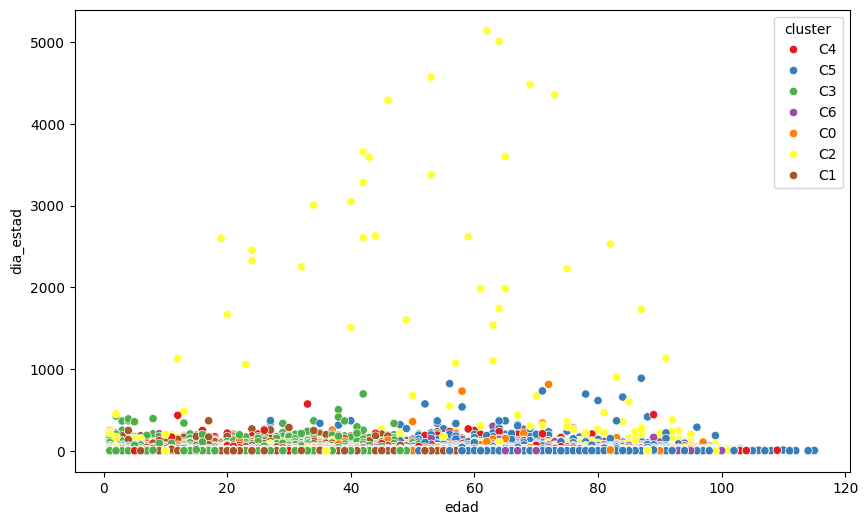

In [12]:
#Visualización de los grupos por edad y días de estancia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="edad", y="dia_estad", hue="cluster", palette="Set1")

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D usando reducción de dimensionalidad diferente a PCA.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

In [18]:
#Escogemos la muestra aleatoria para nuestro t-SNE
df_tsne = df.sample(frac=0.01, random_state=6)

vars_paciente = ["edad", "dia_estad", "sexo", "area_res", "con_egrpa", "etnia", "dis_pac"]
X_tsne = df_tsne[vars_paciente]
X_tsne_scaled = StandardScaler().fit_transform(X_tsne)

/tmp/ipython-input-2255358172.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


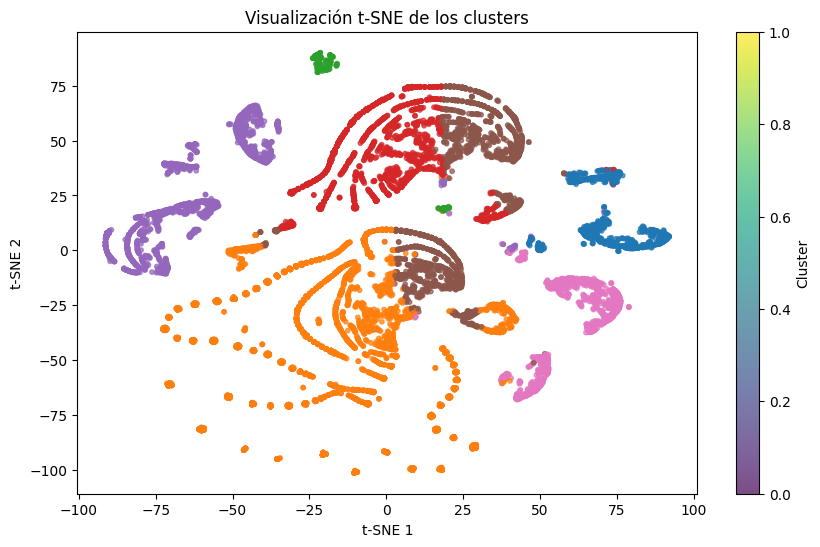

In [14]:
#Vamos a utilizar visulaización t-SNE por la bidimensionalidad que ya se trabaja, solo ayudará a ver mejor los clusters
tsne = TSNE(n_components=2, random_state=6, perplexity=50, )
X_tsne = tsne.fit_transform(X_tsne_scaled)

#Visualización
plt.figure(figsize=(10, 6))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=df_tsne["cluster"],
    cmap="tab10",
    s=10,
    alpha=0.7
)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("Visualización t-SNE de los clusters")
plt.colorbar(label="Cluster")
plt.show()

Si bien k-means nos permitió trabajar con la completitud de nuestros datos, al intentar visulaizar esto con t-SNE el algoritmo tarde una gran cantidad de tiempo en completarse, por lo que se usara una muestra con nuestros datos ya etiquetados según su cluster.

POr lo que podemos ver la mayoría de clusters se encuentran bien difercniados, a excepción de algunos caos puntuales en que algunos puntos se encuentran.
Podría decir que el agrupamiento es bueno

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [19]:
#Aplicamos silhouette score a nuestros grupos para ver los resultados
silhouette_avg = silhouette_score(X_tsne_scaled, df_tsne['cluster'].str.replace('C', '').astype(int))
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.37792635493656235


Con una silueta de $≈0.38$ tenemos un agrupamiento considerablemente mediocre, sin mebargo, considerando la complejidad del perfil médico entre pacientes es comprensible que algunos puntos de nuestros grupos se parezcan y por ende la separación entre los grupos no sea la mejor. Considerando que se está tratando con data real se puede considerar como un resultado aceptable y que tal vez el agregado de más variables que diferencien a los pacientes haría que los clusters se dividan de mejor manera.